In [1]:
# Importing all the necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the csv 
df = pd.read_csv("FootLocker.csv")

In [3]:
df.head()

,OrderNumber,Month,DayNite,SalesPerson,ProductID,ShoeBrand,ShoeStyle,ShoeColor,ShoeGender,Price,StoreCity,CustGender,CustAge,OnSale,discount,AgeGP,Cost
0,MEM1,January,AM,Bob,455339,Adidas,Powerblaze,Black/White,M,74.95,MEMPHIS,M,58,N,0.0,Over 55,58.90
1,MEM2,January,AM,Cindy,407696,ASICS,GEL-Evate? 3,Aqua/Yellow,W,149.95,MEMPHIS,F,23,N,0.0,18-25,44.73
2,GER3,January,PM,Bob,407809,ASICS,GEL-Hyper Speed? 6,Blue,M,84.95,GERMANTOWN,M,50,N,0.0,45-55,30.80
3,MEM4,January,PM,Karen,200121,Nike,Air Jordan 2,Black/Red/Aqua,W,130.00,MEMPHIS,F,12,N,0.0,18-25,100.38
4,MEM5,January,PM,Bob,424073,New Balance,M870v4,Grey/White,M,114.95,MEMPHIS,M,29,N,0.0,26-35,90.48


In [4]:
# Creating the calculated column profit
df['Profit'] = round((df['Price']-df['discount'])- df['Cost'],2)

In [5]:
# Cleaning negative profits 
Neg_Profit = df[df['Profit'] < 0]
Neg_Profit

,OrderNumber,Month,DayNite,SalesPerson,ProductID,ShoeBrand,ShoeStyle,ShoeColor,ShoeGender,Price,StoreCity,CustGender,CustAge,OnSale,discount,AgeGP,Cost,Profit
9,MEM10,January,AM,Cindy,382160,ASICS,GEL-Zaraca?,Aqua/Yellow,W,67.99,MEMPHIS,F,62,N,0.0,Over 55,75.14,-7.15
31,BAR32,January,PM,Shelly,200254,Nike,Air Jordan,Red/Black,M,159.99,BARTLETT,M,25,N,0.0,18-25,182.31,-22.32
36,GER37,January,PM,Ashley,200128,Nike,Nike Dunk Ultra Modern,White/Grey,W,110.00,GERMANTOWN,F,30,N,0.0,26-35,118.72,-8.72
43,MEM44,January,AM,Bob,407786,ASICS,33-FA?,Black,M,109.95,MEMPHIS,M,34,N,0.0,26-35,114.37,-4.42
46,MEM47,January,PM,Karen,385549,Saucony,Saucony Triumph,Green/Blue,W,88.89,MEMPHIS,F,56,N,0.0,Over 55,97.82,-8.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,MEM1450,June,AM,Mandeep,200156,Nike,Nike AF-1 Ultra Force Mid,White/Black,W,64.97,MEMPHIS,F,70,N,0.0,Over 55,67.16,-2.19
1458,COL1459,June,PM,Derrick,200237,Nike,Nike Free Cross Bionic 4,Red,W,110.00,COLLIERVILLE,F,36,N,0.0,36-45,110.77,-0.77
1466,MEM1467,June,PM,Karen,409279,Saucony,Saucony Triumph,Black/Red/Aqua,W,88.89,MEMPHIS,F,27,N,0.0,26-35,97.25,-8.36
1478,COR1479,June,PM,Derrick,200238,Nike,Nike Flyknit Lunar,Blue/Green,M,109.99,CORDOVA,M,21,N,0.0,18-25,116.35,-6.36


In [6]:
# Changing the negative profits to zero
df.loc[df['Profit']< 0, 'Profit'] = 0

In [7]:
# Rechecking if the negative profits are still there
Neg_Profit1 =df[df['Profit'] < 0]
Neg_Profit1

,OrderNumber,Month,DayNite,SalesPerson,ProductID,ShoeBrand,ShoeStyle,ShoeColor,ShoeGender,Price,StoreCity,CustGender,CustAge,OnSale,discount,AgeGP,Cost,Profit


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderNumber  1500 non-null   object 
 1   Month        1500 non-null   object 
 2   DayNite      1500 non-null   object 
 3   SalesPerson  1500 non-null   object 
 4   ProductID    1500 non-null   int64  
 5   ShoeBrand    1500 non-null   object 
 6   ShoeStyle    1500 non-null   object 
 7   ShoeColor    1500 non-null   object 
 8   ShoeGender   1500 non-null   object 
 9   Price        1500 non-null   float64
 10  StoreCity    1500 non-null   object 
 11  CustGender   1500 non-null   object 
 12  CustAge      1500 non-null   int64  
 13  OnSale       1500 non-null   object 
 14  discount     1500 non-null   float64
 15  AgeGP        1500 non-null   object 
 16  Cost         1500 non-null   float64
 17  Profit       1500 non-null   float64
dtypes: float64(4), int64(2), object(12)
memory usage

In [9]:
df.describe()

,ProductID,Price,CustAge,discount,Cost,Profit
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000
mean,294956.141333,109.732933,35.534000,0.026780,73.80132,37.238640
std,97689.603425,37.255125,14.556033,0.095016,40.25586,32.414542
min,200119.000000,46.970000,12.000000,0.000000,9.88000,0.000000
25%,200213.000000,84.970000,23.000000,0.000000,42.99500,8.927500
50%,200301.000000,100.000000,34.000000,0.000000,67.03000,32.395000
75%,388255.000000,123.990000,46.000000,0.000000,96.72250,57.965000
max,456140.000000,245.000000,71.000000,0.500000,258.85000,182.860000


In [10]:
df.columns

Index(['OrderNumber', 'Month', 'DayNite', 'SalesPerson', 'ProductID',
       'ShoeBrand', 'ShoeStyle', 'ShoeColor', 'ShoeGender', 'Price',
       'StoreCity', 'CustGender', 'CustAge', 'OnSale', 'discount', 'AgeGP',
       'Cost', 'Profit'],
      dtype='object')

In [11]:
df.isnull().sum()

OrderNumber    0
Month          0
DayNite        0
SalesPerson    0
ProductID      0
ShoeBrand      0
ShoeStyle      0
ShoeColor      0
ShoeGender     0
Price          0
StoreCity      0
CustGender     0
CustAge        0
OnSale         0
discount       0
AgeGP          0
Cost           0
Profit         0
dtype: int64

In [12]:
df['StoreCity'].unique()

array(['MEMPHIS', 'GERMANTOWN', 'BARTLETT', 'Memphis', 'CORDOVA',
       'COLLIERVILLE'], dtype=object)

In [13]:
# clean the storecity column to correct Memphis data and check how many rows affected by the error
Memphis_data = df[df.apply(lambda row: row.astype(str).str.contains('Memphis', case=True, na=False).any(), axis=1)]
Memphis_data

,OrderNumber,Month,DayNite,SalesPerson,ProductID,ShoeBrand,ShoeStyle,ShoeColor,ShoeGender,Price,StoreCity,CustGender,CustAge,OnSale,discount,AgeGP,Cost,Profit
33,MEM34,January,AM,Bob,407689,ASICS,GEL-Nimbus? 17,Aqua/Black/White,M,149.95,Memphis,M,22,N,0.00,18-25,111.54,38.41
265,MEM266,January,PM,Mandeep,385614,Brooks,Ghost,Aqua/Black/White,W,99.99,Memphis,F,40,Y,0.42,36-45,85.66,13.91
471,MEM472,February,PM,Mandeep,200189,Nike,Nike Flyknit Air Max,Blue/Green,W,99.97,Memphis,F,47,N,0.00,45-55,56.70,43.27
655,MEM656,March,PM,Felipe,385614,Brooks,Ghost,Aqua/Black/White,W,99.99,Memphis,F,40,N,0.00,36-45,36.91,63.08
891,MEM892,April,AM,Bob,407689,ASICS,GEL-Nimbus? 17,Aqua/Black/White,M,149.95,Memphis,M,22,N,0.00,18-25,65.87,84.08
1133,MEM1134,May,PM,Derrick,200189,Nike,Nike Flyknit Air Max,Blue/Green,W,99.97,Memphis,F,47,N,0.00,45-55,28.28,71.69


In [14]:
# check the rows with MEMPHIS data
Memphis_data1 = df[df.apply(lambda row: row.astype(str).str.contains('MEMPHIS', case=True, na=False).any(), axis=1)]
Memphis_data1

,OrderNumber,Month,DayNite,SalesPerson,ProductID,ShoeBrand,ShoeStyle,ShoeColor,ShoeGender,Price,StoreCity,CustGender,CustAge,OnSale,discount,AgeGP,Cost,Profit
0,MEM1,January,AM,Bob,455339,Adidas,Powerblaze,Black/White,M,74.95,MEMPHIS,M,58,N,0.0,Over 55,58.90,16.05
1,MEM2,January,AM,Cindy,407696,ASICS,GEL-Evate? 3,Aqua/Yellow,W,149.95,MEMPHIS,F,23,N,0.0,18-25,44.73,105.22
3,MEM4,January,PM,Karen,200121,Nike,Air Jordan 2,Black/Red/Aqua,W,130.00,MEMPHIS,F,12,N,0.0,18-25,100.38,29.62
4,MEM5,January,PM,Bob,424073,New Balance,M870v4,Grey/White,M,114.95,MEMPHIS,M,29,N,0.0,26-35,90.48,24.47
5,MEM6,January,PM,Karen,387367,New Balance,W1260v4,Red/Blue,M,144.95,MEMPHIS,M,24,N,0.0,18-25,100.20,44.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,MEM1492,June,PM,Mandeep,411863,Reebok,Dual Rush Z,White,W,69.95,MEMPHIS,F,61,N,0.0,Over 55,14.35,55.60
1494,MEM1495,June,PM,Derrick,200219,Nike,Air Jordan,Black/Orange,M,159.99,MEMPHIS,M,48,N,0.0,45-55,158.00,1.99
1495,MEM1496,June,PM,Derrick,200219,Nike,Air Jordan,Black/Orange,M,159.99,MEMPHIS,M,15,N,0.0,18-25,60.41,99.58
1496,MEM1497,June,PM,Mandeep,364815,Saucony,Saucony Triumph,White/Black,W,88.89,MEMPHIS,F,64,N,0.0,Over 55,38.82,50.07


In [15]:
# replace Memphis with MEMPHIS
df['StoreCity']=df['StoreCity'].replace('Memphis','MEMPHIS')


In [16]:
# check if the changes have been updated
Memphis_data2 = df[df.apply(lambda row: row.astype(str).str.contains('MEMPHIS', case=True, na=False).any(), axis=1)]
Memphis_data2

,OrderNumber,Month,DayNite,SalesPerson,ProductID,ShoeBrand,ShoeStyle,ShoeColor,ShoeGender,Price,StoreCity,CustGender,CustAge,OnSale,discount,AgeGP,Cost,Profit
0,MEM1,January,AM,Bob,455339,Adidas,Powerblaze,Black/White,M,74.95,MEMPHIS,M,58,N,0.0,Over 55,58.90,16.05
1,MEM2,January,AM,Cindy,407696,ASICS,GEL-Evate? 3,Aqua/Yellow,W,149.95,MEMPHIS,F,23,N,0.0,18-25,44.73,105.22
3,MEM4,January,PM,Karen,200121,Nike,Air Jordan 2,Black/Red/Aqua,W,130.00,MEMPHIS,F,12,N,0.0,18-25,100.38,29.62
4,MEM5,January,PM,Bob,424073,New Balance,M870v4,Grey/White,M,114.95,MEMPHIS,M,29,N,0.0,26-35,90.48,24.47
5,MEM6,January,PM,Karen,387367,New Balance,W1260v4,Red/Blue,M,144.95,MEMPHIS,M,24,N,0.0,18-25,100.20,44.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,MEM1492,June,PM,Mandeep,411863,Reebok,Dual Rush Z,White,W,69.95,MEMPHIS,F,61,N,0.0,Over 55,14.35,55.60
1494,MEM1495,June,PM,Derrick,200219,Nike,Air Jordan,Black/Orange,M,159.99,MEMPHIS,M,48,N,0.0,45-55,158.00,1.99
1495,MEM1496,June,PM,Derrick,200219,Nike,Air Jordan,Black/Orange,M,159.99,MEMPHIS,M,15,N,0.0,18-25,60.41,99.58
1496,MEM1497,June,PM,Mandeep,364815,Saucony,Saucony Triumph,White/Black,W,88.89,MEMPHIS,F,64,N,0.0,Over 55,38.82,50.07


### a) Brands and Profitability (10 Points)
The retail operations in Memphis and surrounding areas sell seven brands of shoes. The
management is planning to reduce the number of brands to five. Management wants
information on the least profitable brands to decide on what brands to drop from the stores.
Use appropriate visualization (a table is not enough) to inform and advise management on
what two brands to drop from stores in the Memphis area. In your write-up identify the most
profitable brands and advice management to stock on those brands

In [17]:
# to ascertain the profitability of shoebrands sold in Memphis we use our previous variable for MEMPHIS stores
Profitability = Memphis_data2.groupby(['ShoeBrand'])['Profit'].sum()
Profitability.sort_values(ascending=False)


ShoeBrand
Nike           17399.98
ASICS           4923.60
New Balance     2961.65
Saucony         1920.55
Reebok          1535.07
Brooks          1498.19
Adidas           163.70
Name: Profit, dtype: float64

Text(0.5, 0, 'ShoeBrand')

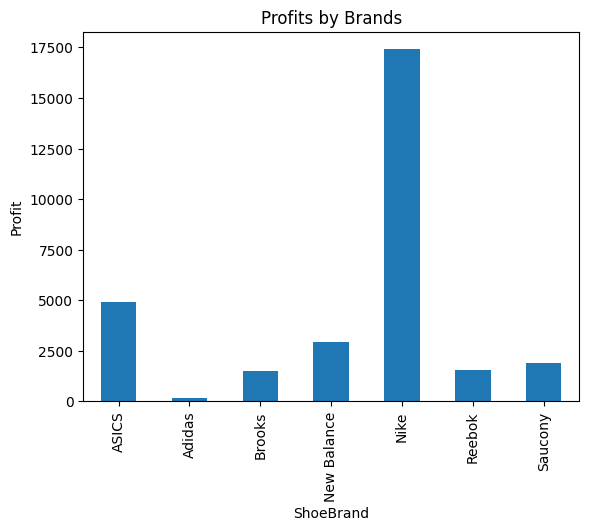

In [18]:
# we now plot the graph of profitability
Profitability.plot(kind='bar')
plt.title('Profits by Brands')
plt.ylabel('Profit')
plt.xlabel('ShoeBrand')

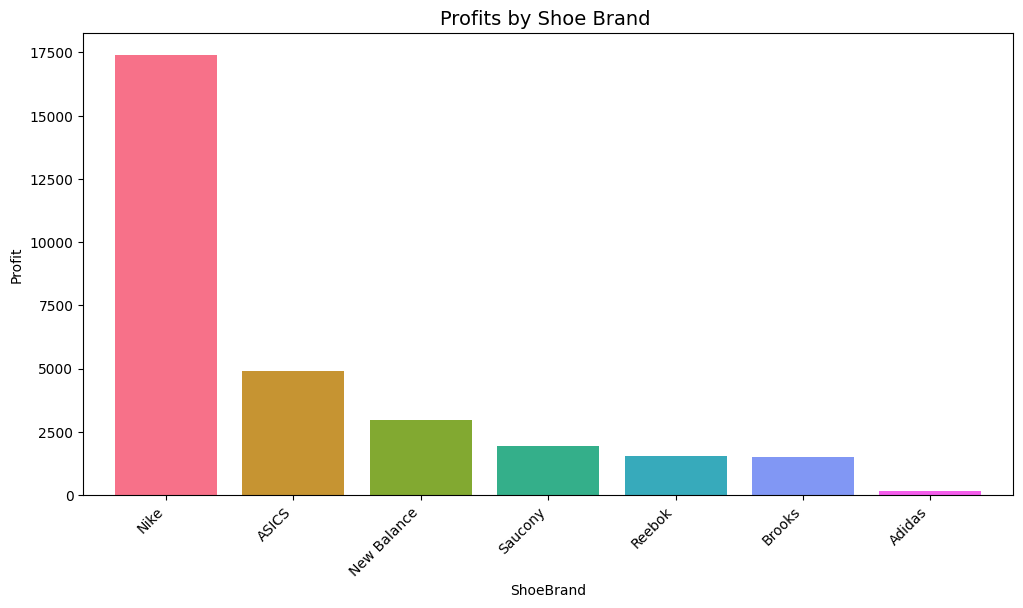

In [28]:
# Use a seaborn palette (e.g., 'viridis', 'husl', 'muted')
palette = sns.color_palette("husl", len(Profitability))

# Plot
Profitability.sort_values(ascending=False).plot(kind='bar',
                  color=palette,  
                  figsize=(12, 6),
                  width=0.8)

plt.title('Profits by Shoe Brand ', fontsize=14)
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.show()


### b) Salesperson and Profitability (10 Points)
Currently the retail operations in the Memphis area employ 12 salespeople but they are
planning to downsize to 8 salespeople. The management would like to retain the top eight
performing salespeople in terms of profits.
Use appropriate visualization (a table is not enough) to inform and advise the management on
which four salespeople to lay off. In your write-up identify the most profitable salespeople
and advise management on whom to lay off.

In [19]:
# we use the Memphis data to find out the most profitable employees in Memphis
sales_person_profit= Memphis_data2.groupby('SalesPerson')['Profit'].sum()
sales_person_profit.sort_values(ascending=False)

SalesPerson
Samuel     4036.95
Ashley     3679.38
Derrick    3186.99
Karen      3185.42
Bob        2901.78
Gary       2887.05
Mandeep    2824.69
Kevin      2320.79
Alfonso    1498.13
Shelly     1371.33
Felipe     1332.63
Cindy      1177.60
Name: Profit, dtype: float64

Text(0.5, 0, 'Profit')

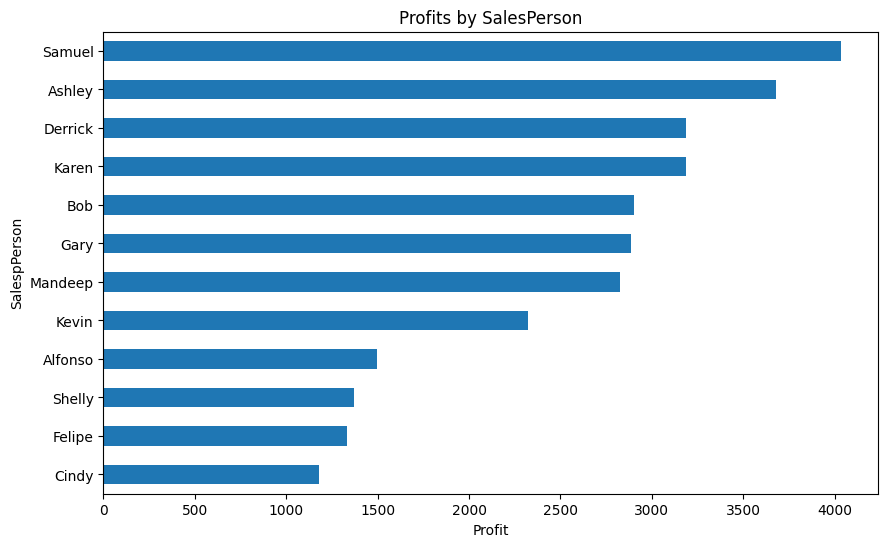

In [32]:
# plotting the profit generated by employees
sales_person_profit.sort_values().plot(kind='barh',figsize=(10,6))
plt.title('Profits by SalesPerson')
plt.ylabel('SalespPerson')
plt.xlabel('Profit')

In [21]:
sales_all = df.groupby('SalesPerson')['Profit'].sum()
sales_all.sort_values(ascending=False)

SalesPerson
Mandeep    6652.52
Gary       6404.90
Ashley     6131.72
Samuel     5702.43
Derrick    4973.54
Alfonso    4610.23
Bob        4574.04
Karen      4447.13
Kevin      3734.11
Felipe     3649.19
Shelly     2680.01
Cindy      2298.14
Name: Profit, dtype: float64

### c)Night and Day Sales Profits (10 Points)
A manager at one of the stores believes that the stores make more profit during the night than
at day ( AM = day , PM = Night) , however several of the salespeople disagree with the
manager because most do not want to work the night shift.

In [33]:
Time_Profits = df.groupby(['DayNite'])['Profit'].sum()
Time_Profits.sort_values(ascending=False)

DayNite
PM    47934.37
AM     7923.59
Name: Profit, dtype: float64

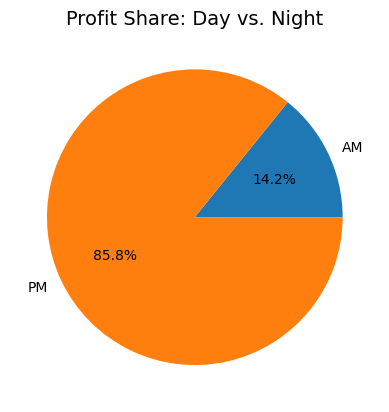

In [ ]:
Time_Profits.plot(kind='pie',autopct='%1.1f%%')
plt.title('Profit Share: Day vs. Night', fontsize=14)
plt.ylabel('')  
plt.show()

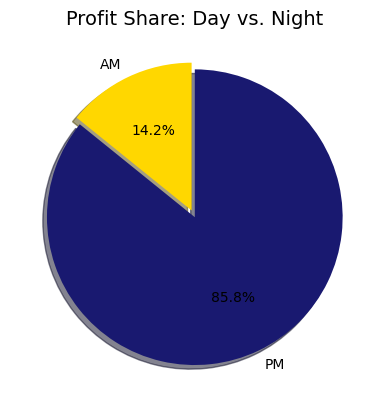

In [35]:
Time_Profits.plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'midnightblue'], 
                 explode=(0.05, 0), shadow=True, startangle=90)
plt.title('Profit Share: Day vs. Night', fontsize=14)
plt.ylabel('')  # Hide default 'Profit' label
plt.show()

In [23]:
signature_profits= df.groupby(['ShoeStyle'])['Profit'].sum().reset_index()
signature_profits

,ShoeStyle,Profit
0,3190 v1,41.06
1,33-DFA?,64.31
2,33-FA?,122.36
3,33-M?,260.61
4,Air Jordan,3508.27
...,...,...
196,WT510v2,109.41
197,WT980 Fresh Foam,211.62
198,YourFlex MT,125.11
199,Zquick 2,382.03


In [24]:
signature_profits.sort_values(
    by=(['ShoeStyle']),
    key=lambda col: col.str.contains('Air Jordan|Air Jordan 2|Lebron 12 iD|Lebron Xiii'),
    ascending=False
)


,ShoeStyle,Profit
4,Air Jordan,3508.27
5,Air Jordan 2,5597.85
0,3190 v1,41.06
139,Nike Free Trainer 5.0 V6,55.05
129,Nike Free 5.0,922.51
...,...,...
71,Horween Leather,405.02
72,Ignition,216.13
73,Kobe X iD,402.46
74,LeBron 12 iD,1015.27
